In [1]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Load data set
# Read in the insurance dataset from github repository
path = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# See info
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# see summary statistics and transpose output
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


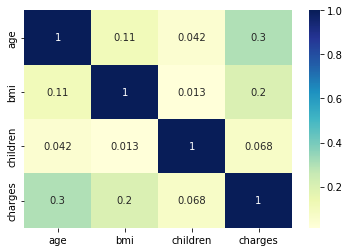

In [5]:
# Explore correlation between data and plot correlation matrix heatmap
insurance.corr()
dataplot = sns.heatmap(insurance.corr(), cmap='YlGnBu', annot = True)

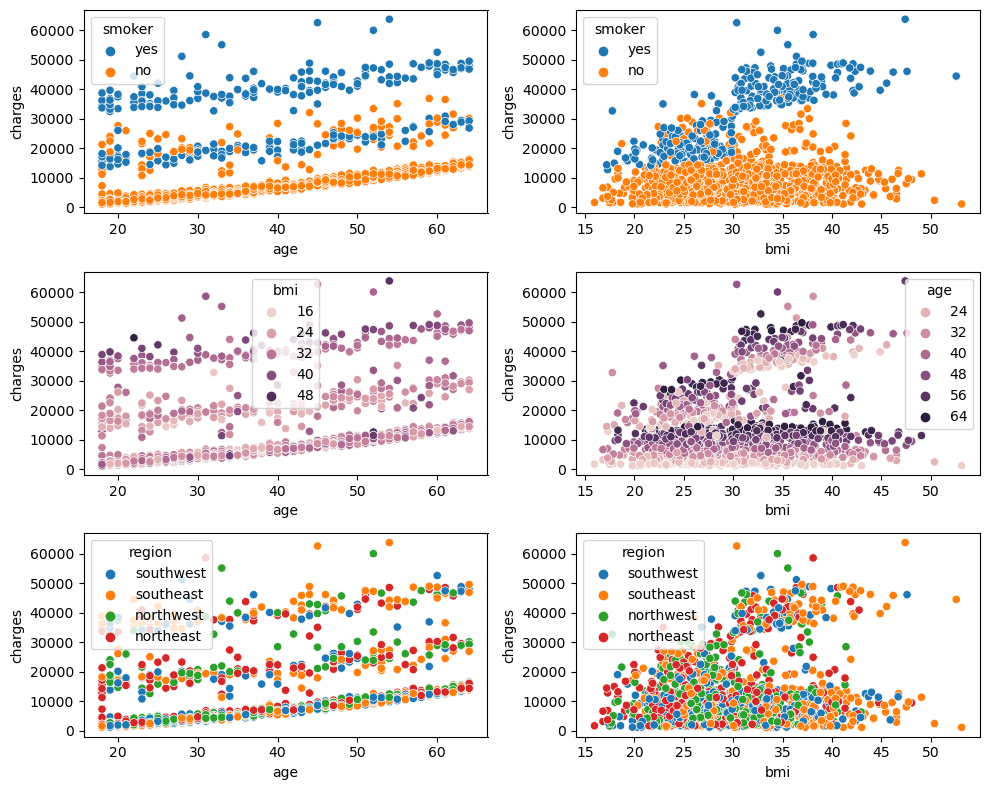

In [6]:
fig, axes = plt.subplots(3,2,dpi=100,figsize=(10,8))
sns.scatterplot(x='age', y='charges', data = insurance, hue = 'smoker',ax = axes[0][0])
sns.scatterplot(x='age', y='charges', data = insurance, hue = 'bmi', ax = axes[1][0])
sns.scatterplot(x='age', y='charges', data = insurance, hue = 'region',ax = axes[2][0])

sns.scatterplot(x='bmi', y='charges', data = insurance, hue = 'smoker', ax = axes[0][1])
sns.scatterplot(x='bmi', y='charges', data = insurance, hue = 'age', ax = axes[1][1])
sns.scatterplot(x='bmi', y='charges', data = insurance, hue = 'region', ax = axes[2][1])

plt.tight_layout()


In [7]:
# one-hot encode categorical features into arrays
#insurance_onehot_encoding = pd.get_dummies(insurance)
#insurance_onehot_encoding.head()

In [8]:
# one-hot encode categorical features into arrays
#insurance_onehot_encoding_reduced = pd.get_dummies(insurance, drop_first = True,)
#insurance_onehot_encoding_reduced.head()

In [9]:
# Split data into features (independent variable) and label (dependent variable)
X = insurance.drop(['charges','region'], axis = 1) #ignore region feature as not corralated
y = insurance['charges']

In [10]:
X.head()

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no


In [11]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [12]:
# Create train and test data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [13]:
# data preparartion with scaling/normalization

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer 

ct = make_column_transformer(

    (MinMaxScaler(),['bmi','age','children']), # turn all values in these columns in numbers between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
    
)


In [14]:
#Fit column transformer to training data
# data preparartion with scaling/normalization

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer 

ct = make_column_transformer(

    (MinMaxScaler(),['bmi','age','children']), # turn all values in these columns in numbers between 0 and 1
    (OneHotEncoder(handle_unknown='ignore', drop = 'first'),['sex','smoker'])
    
)


In [15]:
# fit the column transformer to the training data only (test data should not be revealed and used)
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['bmi', 'age', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['sex', 'smoker'])])

In [16]:
# transform both train and test data sets with normalization (MinMaxScaler) and one-hot encoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [17]:
type(X_train_normal)

numpy.ndarray

In [18]:
X_train_normal.shape

(1137, 5)

In [19]:
# Build neural network 
# set random seed 
tf.random.set_seed(42)
# 1 Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.Input(shape=(5,)),
    tf.keras.layers.Dense(10, name = 'FirstLayer'),
    tf.keras.layers.Dense(1, name = 'SecondLayer'),
    

])

# 2. Compile the model

insurance_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.mae,
    metrics=['mae'])

# 3. Fit model
#set early stop callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=20)

history = insurance_model.fit(x = X_train_normal,  y = y_train, epochs=500, verbose=1,callbacks=[callback])

Epoch 1/500
36/36 [==============================] - 0s 609us/step - loss: 13142.7275 - mae: 13142.7275
Epoch 2/500
36/36 [==============================] - 0s 665us/step - loss: 12021.1465 - mae: 12021.1465
Epoch 3/500
36/36 [==============================] - 0s 638us/step - loss: 9640.2734 - mae: 9640.2734
Epoch 4/500
36/36 [==============================] - 0s 665us/step - loss: 7647.9756 - mae: 7647.9756
Epoch 5/500
36/36 [==============================] - 0s 638us/step - loss: 6954.0005 - mae: 6954.0005
Epoch 6/500
36/36 [==============================] - 0s 637us/step - loss: 6609.5874 - mae: 6609.5874
Epoch 7/500
36/36 [==============================] - 0s 611us/step - loss: 6257.2798 - mae: 6257.2798
Epoch 8/500
36/36 [==============================] - 0s 819us/step - loss: 5863.8423 - mae: 5863.8423
Epoch 9/500
36/36 [==============================] - 0s 666us/step - loss: 5413.1470 - mae: 5413.1470
Epoch 10/500
36/36 [==============================] - 0s 610us/step - loss: 49

In [20]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstLayer (Dense)           (None, 10)                60        
_________________________________________________________________
SecondLayer (Dense)          (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


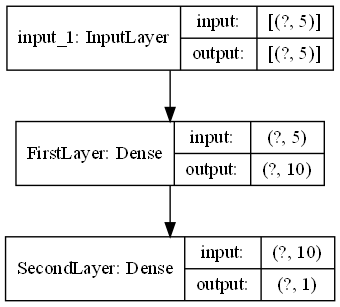

In [21]:
tf.keras.utils.plot_model(insurance_model,
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=100)


In [22]:
insurance_model.evaluate(x = X_test_normal, y = y_test)

7/7 [==============================] - 0s 713us/step - loss: 3181.4116 - mae: 3181.4116


[3181.41162109375, 3181.41162109375]

In [23]:
# plot history or loss curve/ training curve
df = pd.DataFrame(history.history)
df.head()

,loss,mae
0,13142.727539,13142.727539
1,12021.146484,12021.146484
2,9640.273438,9640.273438
3,7647.975586,7647.975586
4,6954.000488,6954.000488


Text(0.5, 0, 'epochs')

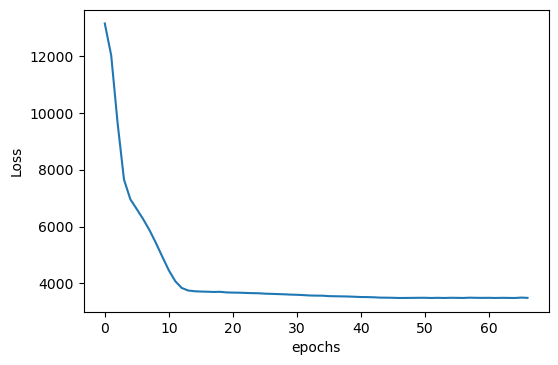

In [24]:
plt.figure(dpi=100)
plt.plot(df['loss'])
plt.ylabel('Loss')
plt.xlabel('epochs')